In [ ]:
#Allocate N circles of known radiuses in a minimum surface rectangle without overlappong each other
#min L*W
#such that:
#          for all i,j: (xi - xj)^2 + (yi - yj)^2 >= (ri + rj)^2
#          for all i: ri <= xi <= W - ri
#          for all i: r1 <= yi <= L - ri

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
#import random

In [8]:
model = AbstractModel()
#N is dimension of board
model.i = Set()
model.j = Set(initialize=model.i)
#Radius parameter defined over the set i
model.R = Param(model.i)

#every bound is between Ri and (L - Ri) = 100(arbitarily chosen big number)
def lowband(model,i):
    return (model.R[i], 100)

model.x = Var(model.i, bounds=lowband, within=NonNegativeReals, initialize=0)
model.y = Var(model.i, bounds=lowband, within=NonNegativeReals, initialize=0)
model.W = Var(bounds=(0, 100), within=NonNegativeReals, initialize=0)
model.L = Var(bounds=(0, 100), within=NonNegativeReals, initialize=0)

def rule_eq1(model, i, j):
    #only distance between two circle centers need to be evaluated once
    # When we evaluate at i=1 and j=2, we do not need to evaluate i=2 and j=1
    if i<j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= (model.R[i]+model.R[j])**2
    else:
        return Constraint.Skip;
model.eq1 = Constraint(model.i, model.j, rule=rule_eq1)

def rule_eq2(model, i):
    return model.x[i] <= model.W - model.R[i]
model.eq2 = Constraint(model.i, rule=rule_eq2)

def rule_eq3(model, i):
    return model.y[i] <= model.L - model.R[i]
model.eq3 = Constraint(model.i, rule=rule_eq3)

def Obj_rule(model):
    return model.W*model.L
model.obj = Objective(rule=Obj_rule, sense=minimize)
opt = SolverFactory('ipopt')

In [9]:
instance = model.create_instance("ExRadius.dat")
results = opt.solve(instance) #sloves and updates instance

WARNING (W1002): Setting Var 'x[1]' to a numeric value `0` outside the bounds
    (2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'x[1]' to a numeric value `0` outside the bounds
    (2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'x[2]' to a numeric value `0` outside the bounds
    (1.2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'x[3]' to a numeric value `0` outside the bounds
    (1.8, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'x[4]' to a numeric value `0` outside the bounds
    (0.9, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'x[5]' to a numeric value `0` outside the bounds
    (3.2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Set

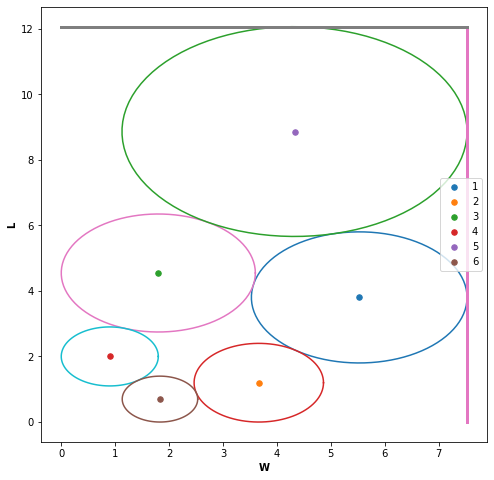

In [10]:
#f, ax = plt.subplots(1, 1)
fig = plt.figure(figsize=(8, 8))
theta = np.linspace(0, 2*np.pi, 100)
for i in instance.i:
    plt.scatter(value(instance.x[i]), value(instance.y[i]),label=str(i), s=30)
    Xc = value(instance.x[i]) + value(instance.R[i])*np.cos(theta)
    Yc = value(instance.y[i]) + value(instance.R[i])*np.sin(theta)
    plt.plot(Xc, Yc)
    plt.plot(value(instance.W)*np.ones(2),[0, value(instance.L)], lw=3)
    plt.plot([0,value(instance.W)], value(instance.L)*np.ones(2), lw=3)

plt.legend(loc='right')
#plt.axis('off')
plt.xlabel('W', fontweight='bold')
plt.ylabel('L', fontweight='bold')
plt.show()